Harry Foster

An Analysis of the NBA Dataset
==========================

In [3]:
NBA <- read.csv('/Data/NBA_Shots_Clean.csv', header=TRUE)
Player_Info <- read.csv('/Data/Player_Info.csv', header=TRUE)
Player_Salary <- read.csv('/Data/Player_Salary.csv', header=TRUE)

In [4]:
print(names(NBA))

 [1] "GAME_ID"             "DATE"                "HOME_TEAM"          
 [4] "AWAY_TEAM"           "PLAYER_NAME"         "PLAYER_ID"          
 [7] "LOCATION"            "WIN_LOSE"            "FINAL_MARGIN"       
[10] "SHOT_NUMBER"         "PERIOD"              "SEC_REMAIN"         
[13] "SHOT_CLOCK"          "DRIBBLES"            "TOUCH_TIME"         
[16] "SHOT_DIST"           "PTS_TYPE"            "CLOSEST_DEFENDER"   
[19] "CLOSEST_DEFENDER_ID" "CLOSE_DEF_DIST"      "SUCCESS"            


In [5]:
print(names(Player_Info))

 [1] "X"           "Age"         "Birth_Place" "Birthdate"   "College"    
 [6] "Experience"  "First_Name"  "Height"      "Pos"         "Surname"    
[11] "Team"        "Weight"      "BMI"        


In [6]:
print(names(Player_Salary))

[1] "Name"   "Salary"


In [7]:
summary(NBA)

    GAME_ID                   DATE          HOME_TEAM       AWAY_TEAM    
 Min.   :21400001   JAN 07, 2015:  1921   SAC    : 4837   GSW    : 4723  
 1st Qu.:21400234   JAN 16, 2015:  1856   CHI    : 4672   PHX    : 4705  
 Median :21400448   NOV 26, 2014:  1803   LAC    : 4645   SAS    : 4521  
 Mean   :21400452   JAN 21, 2015:  1756   WAS    : 4602   OKC    : 4513  
 3rd Qu.:21400674   DEC 05, 2014:  1728   BOS    : 4538   IND    : 4441  
 Max.   :21400908   NOV 28, 2014:  1721   CHA    : 4484   BKN    : 4430  
                    (Other)     :113579   (Other):96586   (Other):97031  
            PLAYER_NAME       PLAYER_ID      LOCATION  WIN_LOSE 
 James Harden     :  1039   Min.   :   708   A:62275   L:61635  
 Monta Ellis      :  1027   1st Qu.:101162   H:62089   W:62729  
 Lamarcus Aldridge:  1026   Median :201939                      
 Lebron James     :   970   Mean   :157322                      
 Russell Westbrook:   962   3rd Qu.:202704                      
 Klay Thompson    

[1] 2.332184

[1] -1.903139

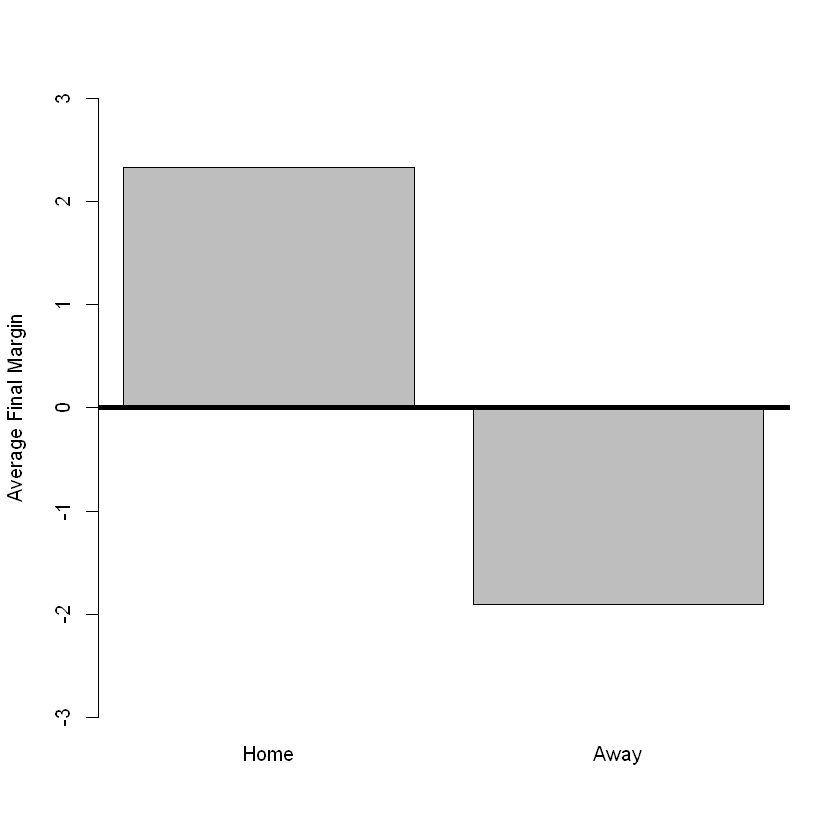

In [8]:
#plot(DRIBBLES~PLAYER_NAME, data=NBA)

Players <- unique(Player_Salary$Name)
Total_Home_Dribbles <- c()
Location <- c()
Total_Home_Dribbles <- mean(subset(NBA, LOCATION == 'H')$FINAL_MARGIN)
Total_Away_Dribbles <- mean(subset(NBA, LOCATION == 'A')$FINAL_MARGIN)

Total_Home_Dribbles
Total_Away_Dribbles

barplot(c(Total_Home_Dribbles, Total_Away_Dribbles), names.arg = c('Home', 'Away'), ylab = 'Average Final Margin', ylim=c(-3,3))
lines(0:50, rep(0,51), col='black', lwd=4)

In [ ]:
install.packages('corrplot',repos='https://cran.ma.imperial.ac.uk/')

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SEC_REMAIN,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE
FINAL_MARGIN,1.000000000,0.000521299,-0.003180153,0.006360343,-0.008377295,0.01109111,0.01085626,0.00850645,0.023086791
SHOT_NUMBER,0.000521299,1.000000000,0.654056518,-0.237975558,-0.039101207,0.14062011,0.14668108,0.01228027,0.003854058
PERIOD,-0.003180153,0.654056518,1.000000000,-0.027661334,-0.044341424,0.05485048,0.04646717,0.02952995,0.048723048
SEC_REMAIN,0.006360343,-0.237975558,-0.027661334,1.000000000,0.084292468,-0.11738180,-0.10595407,-0.02273695,-0.048221419
SHOT_CLOCK,-0.008377295,-0.039101207,-0.044341424,0.084292468,1.000000000,-0.09671939,-0.15299263,-0.19016817,-0.051728203
DRIBBLES,0.011091112,0.140620109,0.054850481,-0.117381803,-0.096719391,1.00000000,0.93101676,-0.08104360,-0.166667908
TOUCH_TIME,0.010856262,0.146681078,0.046467169,-0.105954066,-0.152992635,0.93101676,1.00000000,-0.08473052,-0.182185837
SHOT_DIST,0.008506450,0.012280266,0.029529950,-0.022736954,-0.190168169,-0.08104360,-0.08473052,1.00000000,0.747881452
PTS_TYPE,0.023086791,0.003854058,0.048723048,-0.048221419,-0.051728203,-0.16666791,-0.18218584,0.74788145,1.000000000


[1] 10.77744 10.93940
attr(,"conf.level")
[1] 0.99

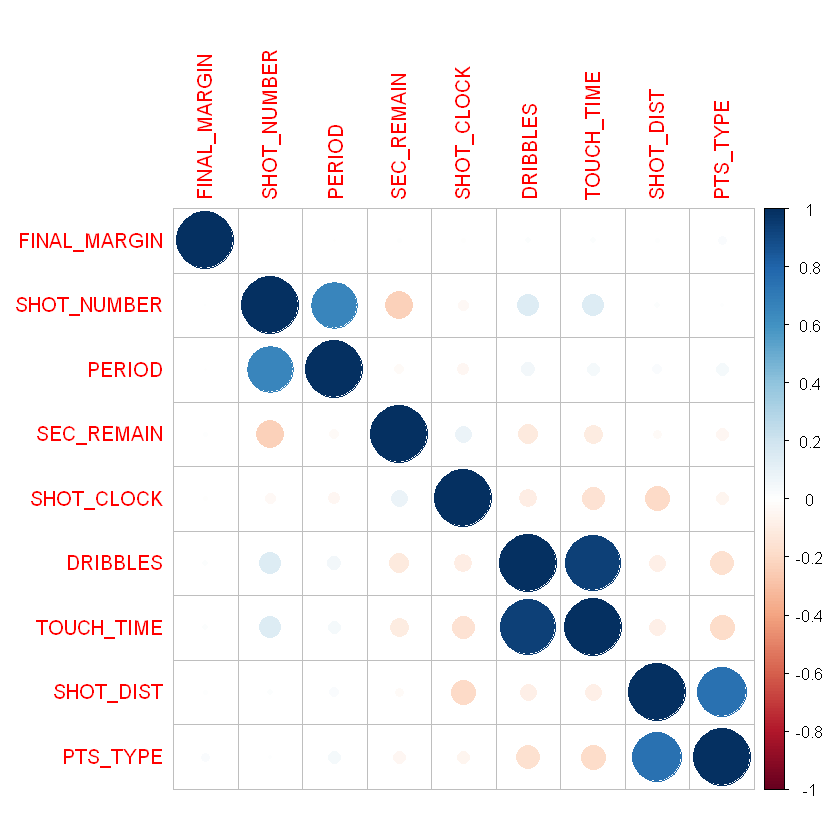

In [18]:
CorrMat <- cor(NBA[9:17])
CorrMat
CI_MeanFINAL <- t.test(NBA$FINAL_MARGIN[NBA$FINAL_MARGIN>=0], conf.level=0.99)$conf.int
CI_MeanFINAL
library(corrplot) 
corrplot(CorrMat, method='circle')

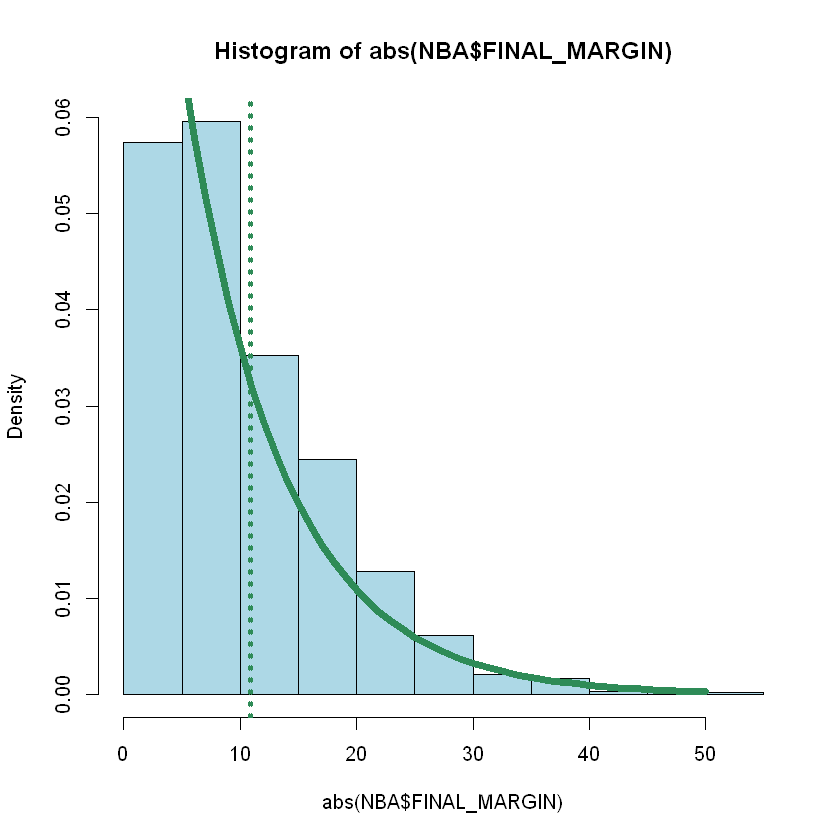

In [19]:
hist(abs(NBA$FINAL_MARGIN), col='light blue', freq=FALSE)
lines(0:50, dexp(0:50, rate=0.12), col='seagreen', lwd=6)
abline(v=CI_MeanFINAL[1], lty=3, lwd=3, col='seagreen')
abline(v=CI_MeanFINAL[2], lty=3, lwd=3, col='seagreen')

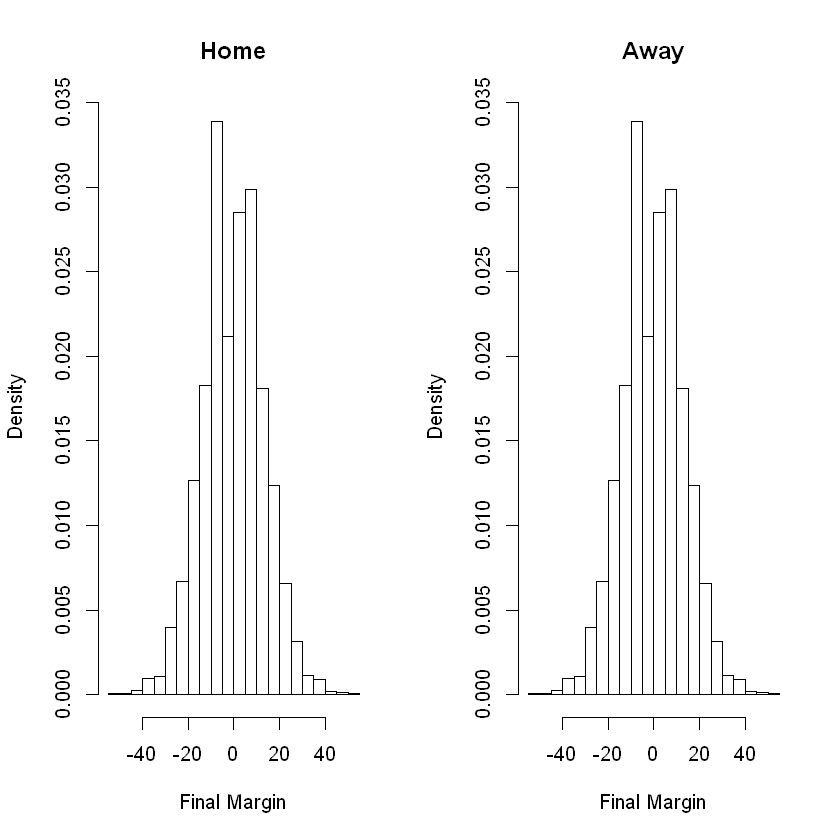

In [20]:
par(mfrow=c(1,2))
hist(subset(NBA, LOCATION='H')$FINAL_MARGIN, xlab = 'Final Margin', freq=FALSE, main='Home')
hist(subset(NBA, LOCATION='A')$FINAL_MARGIN, xlab = 'Final Margin', freq=FALSE, main='Away')

In [21]:
Game_IDs <- unique(NBA$GAME_ID)
Margins <- c()
print(abs(NBA$FINAL_MARGIN))
    

    [1] 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
   [25] 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
   [49] 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
   [73] 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
   [97] 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
  [121] 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
  [145] 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17  1  1  1  1  1  1  1  1
  [169]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [193]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [217]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [241]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [265]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [289]  1  1  1  1  1  1  1  1 18 18 18

In [22]:
Surname_Players_From_Miss <- unique(Player_Info$Surname[Player_Info$College == 'University of Missouri'])
FirstName_Players_From_Miss <- unique(Player_Info$First_Name[Player_Info$College == 'University of Missouri'])
Players_From_Miss <- c()
for (x in 1:length(Surname_Players_From_Miss)){
    Players_From_Miss <- append(Players_From_Miss, paste(FirstName_Players_From_Miss[x], Surname_Players_From_Miss[x]))
}
Players_From_Miss

Surname_Players_From_Mem <- unique(Player_Info$Surname[Player_Info$College == 'University of Memphis'])
FirstName_Players_From_Mem <- unique(Player_Info$First_Name[Player_Info$College == 'University of Memphis'])
Players_From_Mem <- c()
for (x in 1:length(Surname_Players_From_Mem)){
    Players_From_Mem <- append(Players_From_Mem, paste(FirstName_Players_From_Mem[x], Surname_Players_From_Mem[x]))
}
Players_From_Mem

[1] "DeMarre Carroll" "Phil Pressey"    "Jabari Brown"    "Jordan Clarkson"

[1] "Derrick Rose"          "Will Barton"           "Joey Dorsey"          
[4] "Chris Douglas-Roberts" "Tyreke Evans"          "Earl Barron"

In [23]:
Average_Salary_Miss <- mean(Player_Salary$Salary[Player_Salary$Name %in% Players_From_Miss])
Average_Salary_Mem <- mean(Player_Salary$Salary[Player_Salary$Name %in% Players_From_Mem])
Average_Salary_Miss
Average_Salary_Mem

[1] 982067

[1] 5549501

In [24]:
Games_Won_Mem <- length(unique(NBA$GAME_ID[NBA$PLAYER_NAME %in% Players_From_Mem & NBA$WIN_LOSE == 'W']))
Games_Won_Mem
Games_Loss_Mem <- length(unique(NBA$GAME_ID[NBA$PLAYER_NAME %in% Players_From_Mem & NBA$WIN_LOSE == 'L']))
Games_Loss_Mem
Games_Won_Mem/(Games_Loss_Mem + Games_Won_Mem)

[1] 85

[1] 59

[1] 0.5902778

In [25]:
Games_Won_Miss <- length(unique(NBA$GAME_ID[NBA$PLAYER_NAME %in% Players_From_Miss & NBA$WIN_LOSE == 'W']))
Games_Won_Miss
Games_Loss_Miss <- length(unique(NBA$GAME_ID[NBA$PLAYER_NAME %in% Players_From_Miss & NBA$WIN_LOSE == 'L']))
Games_Loss_Miss

Players_Miss <- length(unique(NBA$GAME_ID[NBA$PLAYER_NAME == 'Derrick Rose']))
Players_Miss

[1] 0

[1] 0

[1] 46

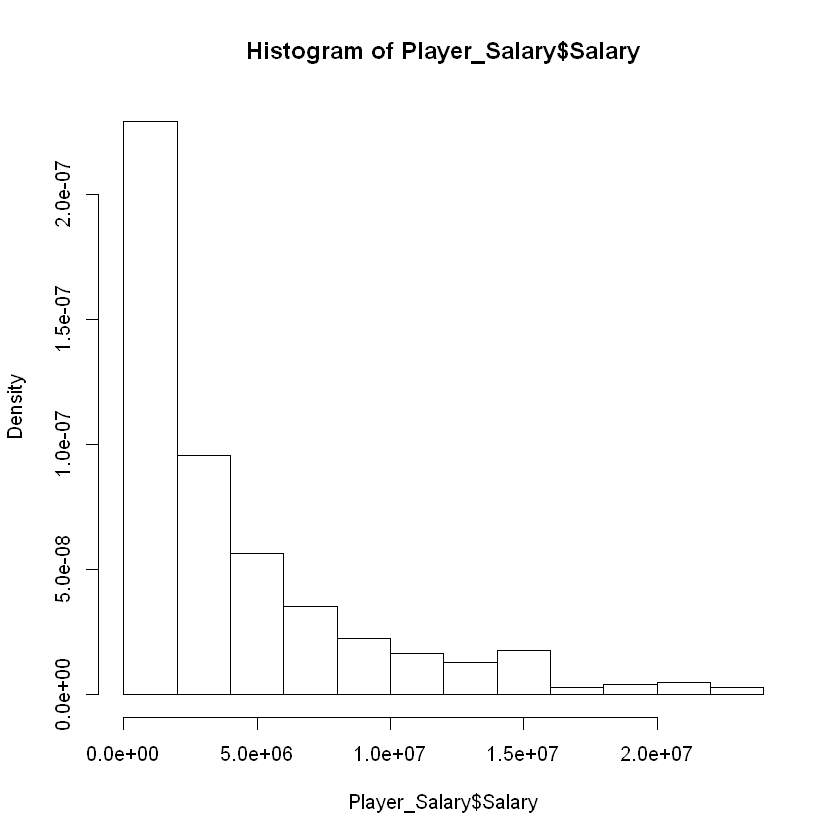

In [26]:
hist(Player_Salary$Salary, freq=FALSE)
lines(pexp(1:5000, rate=100))

In [27]:
Surname_Players_From_Miss <- unique(Player_Info$Surname[Player_Info$College == 'University of Missouri'])
FirstName_Players_From_Miss <- unique(Player_Info$First_Name[Player_Info$College == 'University of Missouri'])
Players_From_Miss <- c()
for (x in 1:length(Surname_Players_From_Miss)){
    Players_From_Miss <- append(Players_From_Miss, paste(FirstName_Players_From_Miss[x], Surname_Players_From_Miss[x]))
}



Universities <- unique(Player_Info$College)
Mean_Salaries_By_Uni <- c()
for (X in Universities){
    #print(X)
    Players_From_X <- c()
    Surname_Players_From_X <- unique(Player_Info$Surname[Player_Info$College == X])
    FirstName_Players_From_X <- unique(Player_Info$First_Name[Player_Info$College == X])
    for (k in 1:length(Surname_Players_From_X)){
        Players_From_X <- append(Players_From_X, paste(FirstName_Players_From_X[k], Surname_Players_From_X[k]))
    }
   # print(Players_From_X)
    #print(mean(Player_Salary$Salary[Player_Salary$Name %in% Players_From_X]))
    Mean_Salaries_By_Uni <- append(Mean_Salaries_By_Uni, mean(Player_Salary$Salary[Player_Salary$Name %in% Players_From_X]))
}

for (x in 1:length(Mean_Salaries_By_Uni)){
    if(is.nan(Mean_Salaries_By_Uni[x])){
        print(is.nan(Mean_Salaries_By_Uni[x]))
        Mean_Salaries_By_Uni <- Mean_Salaries_By_Uni[-x]
        Universities <- Universities[-x]
    }
}


print(Mean_Salaries_By_Uni)
length(Mean_Salaries_By_Uni)
length(Universities)

[1] TRUE
[1] TRUE
[1] TRUE
  [1]  6789528.5  2000000.0  3939012.3   982067.0  1132998.7  7418750.2
  [7]  1113681.0  4265740.5  8589666.5  9500000.0   816482.0  3631971.0
 [13]  2109106.0  8382218.6  3435110.2  9151145.4  1983112.3  8512337.8
 [19]  2522727.5  8113168.0  5668348.2  2320656.0  4394840.0  3860023.2
 [25]   840682.2   538919.5  3438022.0  8128570.2   452864.5  8514841.0
 [31]   816482.0  2589517.8   816482.0  4093414.8  2791175.2  3250000.0
 [37]  2732000.0  7467112.7  5393938.1   654048.0   873652.8  1832621.5
 [43]  5304809.8  2138950.9  2859387.7  5549500.7  3604136.7   106567.0
 [49]  2158241.0  1527285.0  7475562.6  1942493.3   764374.0  3887052.5
 [55]  5676229.7  6754913.0   816481.0  2373537.0  5277313.7  1958939.0
 [61]   507336.0   390082.0  4769361.3  2772480.0  2048062.2  3287840.0
 [67]   737955.0  8798986.5 10629213.0  2587940.0   816482.0  8261328.0
 [73]  5000000.0   948163.0  8000000.0  4434509.7  1227985.0  2511432.0
 [79] 12000000.0   507336.0   507336.

[1] 110

[1] 110